In [395]:
# Dependencies
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import json
import requests
import time
from us import states
# Include this line to make plots interactive
%matplotlib notebook

In [396]:
#load data
csv_path = "Resources/NutritionPhysicalActivityObesity.csv"
nutrition_data = pd.read_csv(csv_path)
age_groups = nutrition_data.groupby('Age(years)')
year_groups = nutrition_data.groupby('YearEnd')

# Create a dataframe counting the number of data points for each age 
age_groups_count = pd.DataFrame(age_groups['Age(years)'].count())
year_groups_count = pd.DataFrame(year_groups['YearEnd'].count())

# View the groupby dataframe 
age_groups_count

,Age(years)
Age(years),
18 - 24,2251
25 - 34,2251
35 - 44,2251
45 - 54,2251
55 - 64,2251
65 or older,2251


In [397]:
# drop unesscary columns and fix labels
nutrition_data = nutrition_data.drop(columns=['Data_Value_Unit',
                                              'StratificationCategory1',
                                              'YearStart',
                                              'ClassID',
                                              'TopicID',
                                              'Income',
                                              'LocationID'
                                             ])

renamecols_df = nutrition_data.rename(columns={"LocationAbbr":"StateAbbr",
                                                "LocationDesc":"State",
                                                "Age(years)":"Age",
                                                "YearEnd":"Year"})
renamecols_df.count()
#renamecols is df before narrowing age demographic

Year                      63028
StateAbbr                 63028
State                     63028
Class                     63028
Topic                     63028
Question                  63028
Data_Value                56796
Data_Value_Alt            56796
Low_Confidence_Limit      56796
High_Confidence_Limit     56796
Sample_Size               56796
Total                      2251
Age                       13506
Education                  9004
Gender                     4502
Race/Ethnicity            18008
GeoLocation               61852
QuestionID                63028
Stratification1           63028
dtype: int64

In [398]:
#trim age column to include only desired age demographic

renamecols_df["Year"] = renamecols_df.Year.astype(str)

agedem_df = renamecols_df.loc[(renamecols_df["Age"] == "18 - 24")
                               |(renamecols_df["Age"] == "25 - 34")
                               |(renamecols_df["Age"] == "35 - 44")
                               |(renamecols_df["Age"] == "45 - 54")
                             ,:]
#trim years to include only five years of data 2014-2018
dem_df = agedem_df.loc[(agedem_df["Year"] == "2014")
                               |(agedem_df["Year"] == "2015")
                               |(agedem_df["Year"] == "2016")
                               |(agedem_df["Year"] == "2017")
                               |(agedem_df["Year"] == "2018")
                              ,:]
dem_df.head()

,Year,StateAbbr,State,Class,Topic,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age,Education,Gender,Race/Ethnicity,GeoLocation,QuestionID,Stratification1
30,2015,NY,New York,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.7,29.7,26.7,32.8,1331.0,NaN,35 - 44,NaN,NaN,NaN,"(42.827001032, -75.543970427)",Q036,35 - 44
62,2014,GU,Guam,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,17.8,17.8,12.5,24.7,308.0,NaN,18 - 24,NaN,NaN,NaN,"(13.444304, 144.793731)",Q047,18 - 24
63,2014,GU,Guam,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,23.4,23.4,18.6,29.1,510.0,NaN,25 - 34,NaN,NaN,NaN,"(13.444304, 144.793731)",Q047,25 - 34
64,2014,GU,Guam,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,27.0,27.0,21.7,32.9,489.0,NaN,35 - 44,NaN,NaN,NaN,"(13.444304, 144.793731)",Q047,35 - 44
65,2014,GU,Guam,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,31.3,31.3,25.9,37.3,513.0,NaN,45 - 54,NaN,NaN,NaN,"(13.444304, 144.793731)",Q047,45 - 54


In [399]:
#narrow dataframe for bargraph that compares obesity rate by age group from 2014-2018

obesity_data_df = dem_df.drop(columns=['Data_Value_Alt',
                                    'Total',
                                    'Education',
                                    'Gender',
                                    'Race/Ethnicity',
                                    'Topic',
                                    'Stratification1'
                                             ])

#q_group = obesity_data.groupby('Question')
#q_group.head()


weight_q_group = obesity_data_df.loc[(dem_df["QuestionID"] == "Q036")
                            
                              ,:]

#bin age data to gen x and gen y
# Create the bins in which gen x and gen y will be held   
bins = [['18 - 24','25 - 34'],['35 - 44','45-54']]

# Create the names for the five bins
group_names = ["Gen Y", "Gen X"]

c = (pd.DataFrame({'Gen': group_names, 'Age': bins})
        .explode('Age')
        .reset_index(drop=True))

obesity_data_df = weight_q_group.merge(c, on = 'Age', how='left')


s = pd.Series(obesity_data_df['Data_Value'])
pd.to_numeric(s)
obesity_data_df.head()

,Year,StateAbbr,State,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age,GeoLocation,QuestionID,Gen
0,2015,NY,New York,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.7,26.7,32.8,1331.0,35 - 44,"(42.827001032, -75.543970427)",Q036,Gen X
1,2014,NM,New Mexico,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.2,28.6,38.1,743.0,25 - 34,"(34.520880952, -106.240580985)",Q036,Gen Y
2,2015,IA,Iowa,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.9,33.4,42.5,597.0,35 - 44,"(42.469400913, -93.816490556)",Q036,Gen X
3,2016,NY,New York,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,12.7,10.3,15.5,1659.0,18 - 24,"(42.827001032, -75.543970427)",Q036,Gen Y
4,2016,MS,Mississippi,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,19.9,14.6,26.5,240.0,18 - 24,"(32.745510099, -89.538030825)",Q036,Gen Y


In [400]:
subjecttest = ['Data_Value']
datasettest = obesity_data_df.groupby(['Year','Age'])[subject].mean()
datasettest

Data_Value
Year Age                
2014 18 - 24   16.359259
     25 - 34   28.029630
     35 - 44   33.064815
     45 - 54   33.922222
2015 18 - 24   17.457407
     25 - 34   27.377778
     35 - 44   32.916667
     45 - 54   34.531481
2016 18 - 24   17.485455
     25 - 34   27.992727
     35 - 44   33.865455
     45 - 54   35.521818
2017 18 - 24   17.392593
     25 - 34   29.559259
     35 - 44   34.038889
     45 - 54   36.640741
2018 18 - 24   18.594444
     25 - 34   30.350000
     35 - 44   35.077778
     45 - 54   37.701852

<IPython.core.display.Javascript object>


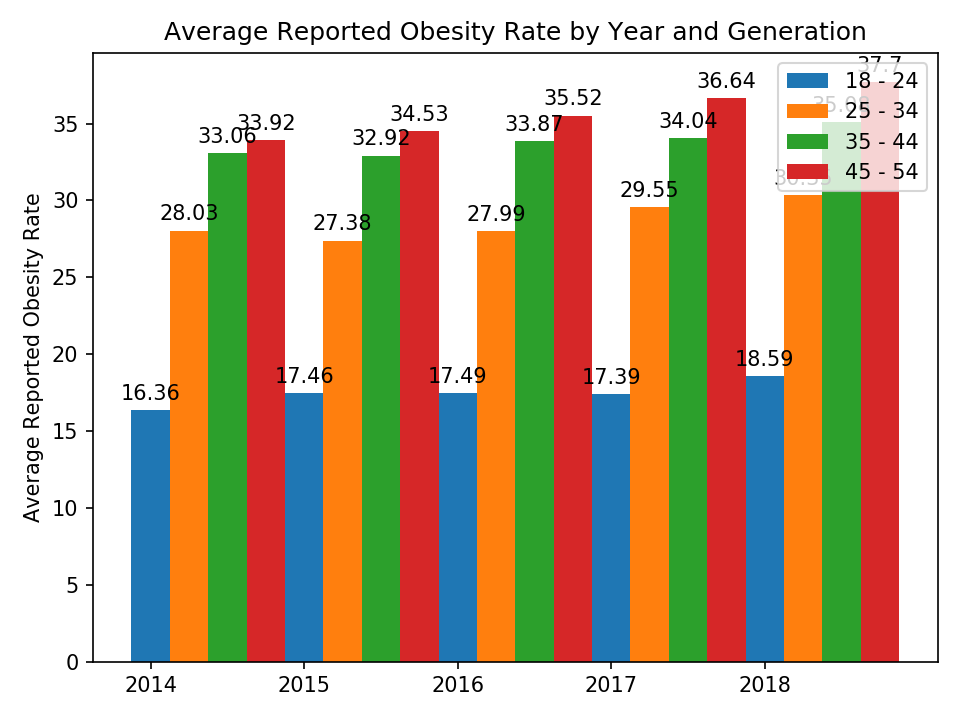

In [401]:
hhlabels =['Gen Y', 'Gen X']
labels = ['2014', '2015', '2016', '2017', '2018']
age1_means = [16.36, 17.46, 17.49, 17.39, 18.59]
age2_means = [28.03, 27.38, 27.99, 29.55, 30.35]
age3_means = [33.06, 32.92, 33.87, 34.04, 35.08]
age4_means = [33.92, 34.53, 35.52, 36.64, 37.70]

x = np.arange(len(labels))  # the label locations
hhx = np.arange(len(hhlabels))  # the high hierarchy label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + 0.00, age1_means, width, label='18 - 24')
rects2 = ax.bar(x + 0.25, age2_means, width, label='25 - 34')
rects3 = ax.bar(x + 0.50, age3_means, width, label='35 - 44')
rects4 = ax.bar(x + 0.75, age4_means, width, label='45 - 54')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Reported Obesity Rate')
ax.set_title('Average Reported Obesity Rate by Year and Generation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

In [402]:
#define data frame for bargraph comparing reported obesity rates by year and generation
subject = ['Data_Value']
dataset = obesity_data_df.groupby(['Year','Gen'])[subject].mean()
dataset

Data_Value
Year Gen              
2014 Gen X   33.064815
     Gen Y   22.194444
2015 Gen X   32.916667
     Gen Y   22.417593
2016 Gen X   33.865455
     Gen Y   22.739091
2017 Gen X   34.038889
     Gen Y   23.475926
2018 Gen X   35.077778
     Gen Y   24.472222

<IPython.core.display.Javascript object>


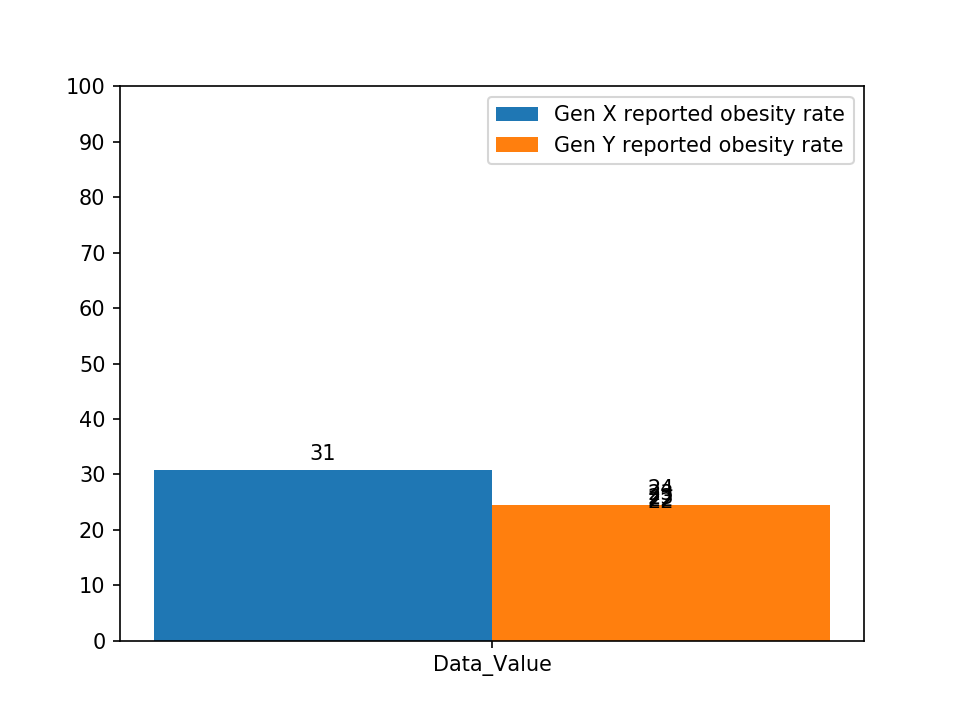

In [403]:
indx = np.arange(len(subject))
score_label = np.arange(0, 110, 10)

bar_width = 0.35

fig, ax = plt.subplots()
barGenX = ax.bar(indx - bar_width/2, GenX_means, bar_width, label='Gen X reported obesity rate')
barGenY = ax.bar(indx + bar_width/2, GenY_means, bar_width, label='Gen Y reported obesity rate')

# inserting x axis label
ax.set_xticks(indx)
ax.set_xticklabels(subject)

# inserting y axis label
ax.set_yticks(score_label)
ax.set_yticklabels(score_label)

# inserting legend
ax.legend()

def insert_data_labels(bars):
    for bar in bars:
        bar_height = bar.get_height()
        ax.annotate('{0:.0f}'.format(bar.get_height()),
            xy=(bar.get_x() + bar.get_width() / 2, bar_height),
            xytext=(0, 3),
            textcoords='offset points',
            ha='center',
            va='bottom'
        )

insert_data_labels(barGenX)
insert_data_labels(barGenY)

plt.show()

<IPython.core.display.Javascript object>


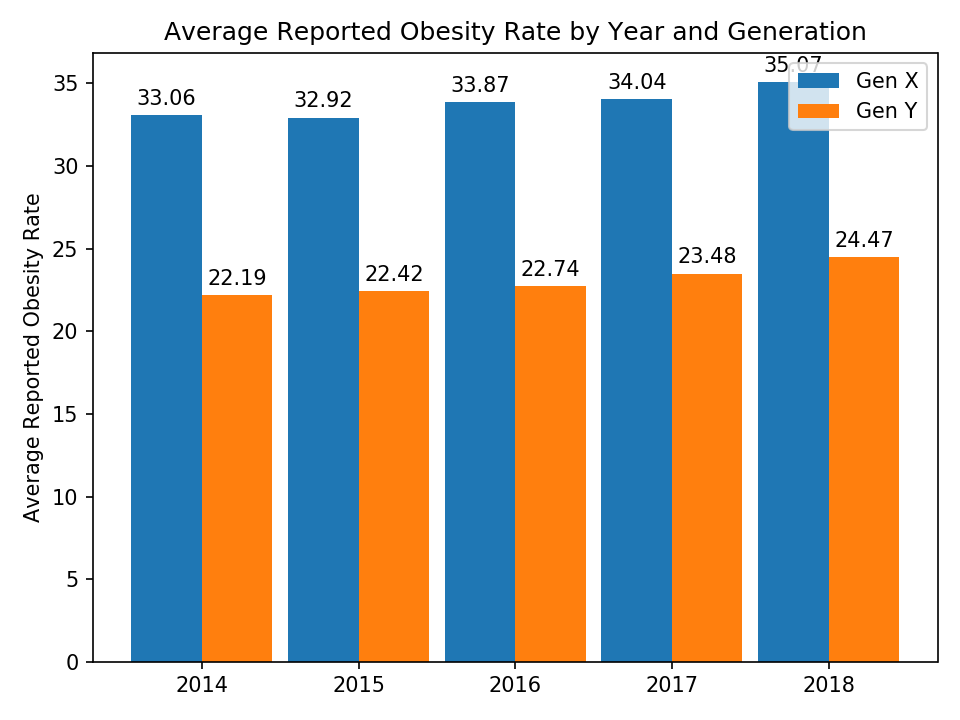

In [404]:
labels = ['2014', '2015', '2016', '2017', '2018']
Genx_means = [33.06, 32.92, 33.87, 34.04, 35.07]
GenY_means = [22.19, 22.42, 22.74, 23.48, 24.47]

x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Genx_means, width, label='Gen X')
rects2 = ax.bar(x + width/2, GenY_means, width, label='Gen Y')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Reported Obesity Rate')
ax.set_title('Average Reported Obesity Rate by Year and Generation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()